In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sin_creater(sample_freq,natural_freq,phase,t=60 ):
  
  Fs = sample_freq*2*np.pi #sampling rate
  T = 1/Fs # period
  
  N = Fs*t # total points 
  omega = 2*np.pi*natural_freq # angular frequency for sine waves

  x = np.arange(N)*T 
  y = np.sin((omega*x)+phase)
  return x,y

#x = sin(3pit/4 +pi/2)
org_x,org_y = sin_creater(2000,3/8,np.pi/2)
t_vec,y = sin_creater(1/8,3/8,np.pi/2)
t_vec1,y1 = sin_creater(2/8,3/8,np.pi/2)
t_vec2,y2 = sin_creater(6/8,3/8,np.pi/2)
t_vec3,y3 = sin_creater(1,3/8,np.pi/2)
t_vec4,y4 = sin_creater(2,3/8,np.pi/2)

#x = sin(pi*t/4 +3pi/5)

org_x1,org_y1 = sin_creater(2000,1/8,3*np.pi/5)
t_vec10,y10 = sin_creater(1/8,1/8,3*np.pi/5)
t_vec11,y11 = sin_creater(2/8,1/8,3*np.pi/5)
t_vec12,y12 = sin_creater(6/8,1/8,3*np.pi/5)
t_vec13,y13 = sin_creater(1,1/8,3*np.pi/5)
t_vec14,y14 = sin_creater(2,1/8,3*np.pi/5)



# PLOTS OF THE FIRST SIGNAL
 

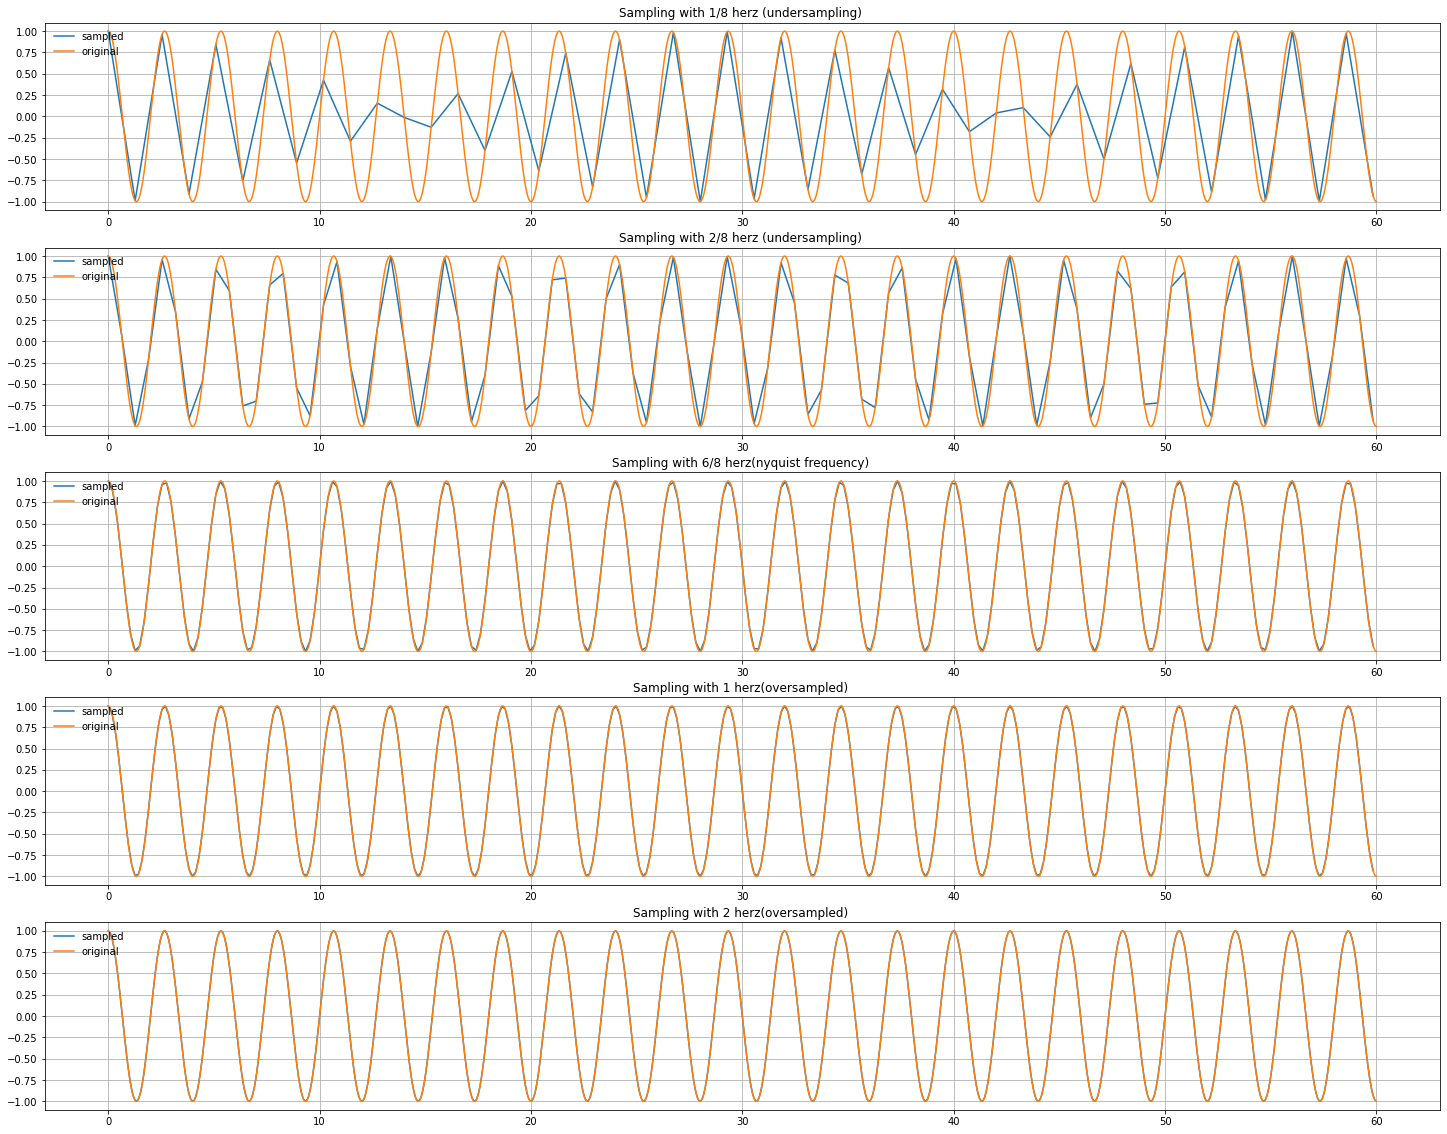

In [8]:
plt.figure(figsize=(25, 20))

plt.subplot(5,1,1)
plt.plot(t_vec,y,label="sampled")
plt.plot(org_x,org_y,label="original")
plt.grid(True)
plt.title('Sampling with 1/8 herz (undersampling) ')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,2)
plt.plot(t_vec1,y1,label="sampled")
plt.plot(org_x,org_y,label="original")
plt.grid(True)
plt.title('Sampling with 2/8 herz (undersampling) ')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,3)
plt.plot(t_vec2,y2,label="sampled")
plt.plot(org_x,org_y,label="original")
plt.grid(True)
plt.title('Sampling with 6/8 herz(nyquist frequency) ')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,4)
plt.plot(t_vec3,y3,label="sampled")
plt.plot(org_x,org_y,label="original")
plt.grid(True)
plt.title('Sampling with 1 herz(oversampled) ')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,5)
plt.plot(t_vec4,y4,label="sampled")
plt.plot(org_x,org_y,label="original")
plt.grid(True)
plt.title('Sampling with 2 herz(oversampled) ')
plt.legend(loc='upper left', frameon=False) 


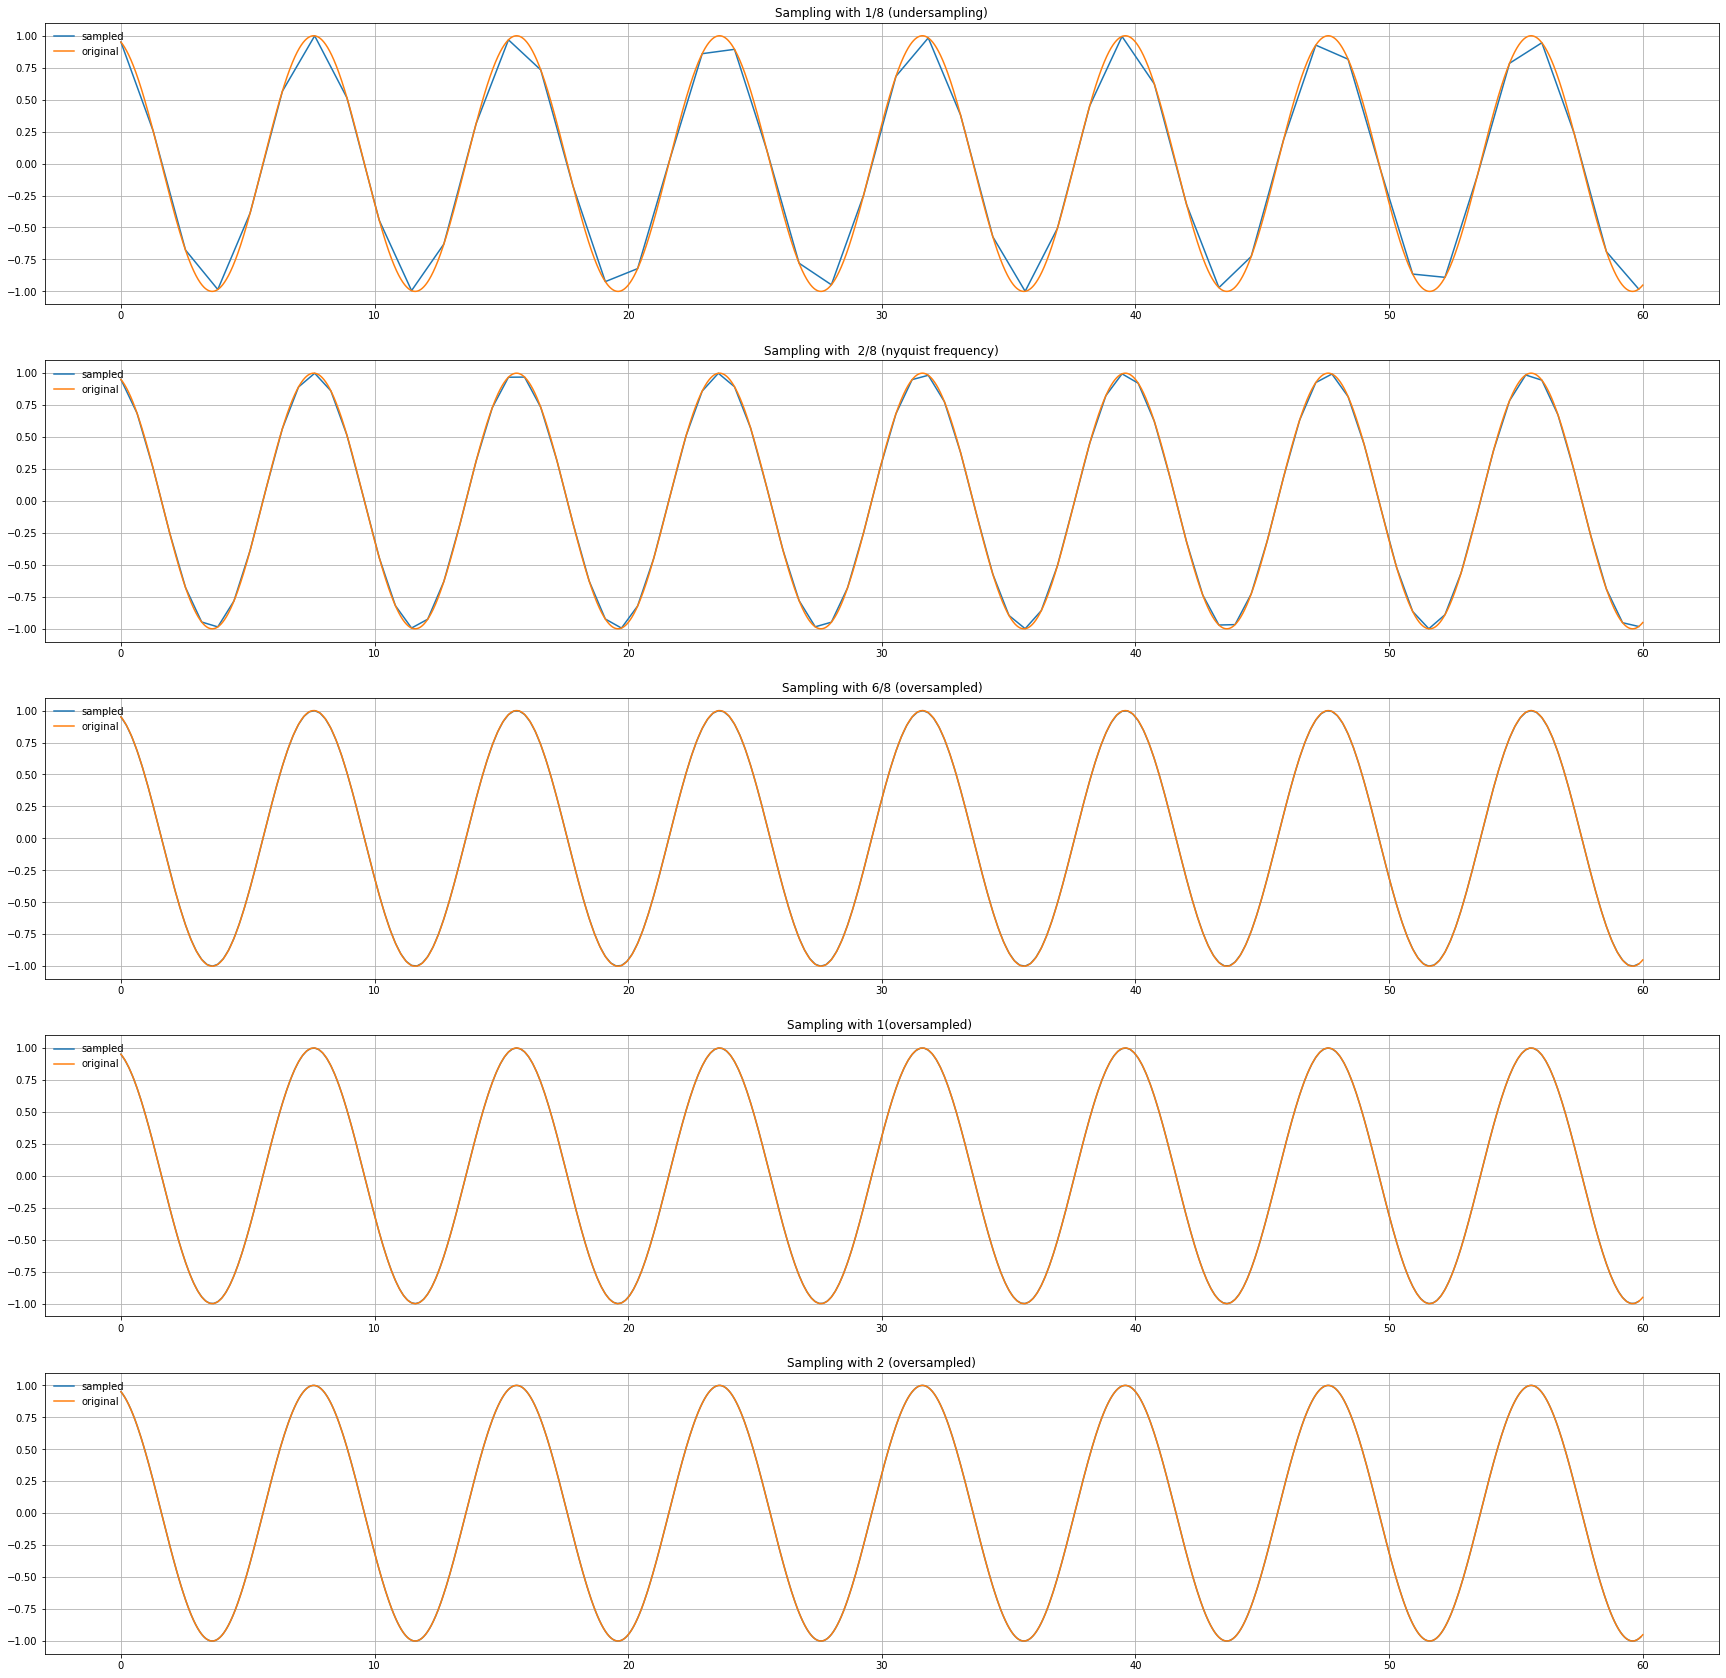

In [7]:
plt.figure(figsize=(30, 30))

plt.subplot(5,1,1)
plt.plot(t_vec10,y10,label="sampled")
plt.plot(org_x1,org_y1,label="original")
plt.grid(True)
plt.title('Sampling with 1/8 (undersampling)')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,2)
plt.plot(t_vec11,y11,label="sampled")
plt.plot(org_x1,org_y1,label="original")
plt.grid(True)
plt.title('Sampling with  2/8 (nyquist frequency)')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,3)
plt.plot(t_vec12,y12,label="sampled")
plt.plot(org_x1,org_y1,label="original")
plt.grid(True)
plt.title('Sampling with 6/8 (oversampled)')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,4)
plt.plot(t_vec13,y13,label="sampled")
plt.plot(org_x1,org_y1,label="original")
plt.grid(True)
plt.title('Sampling with 1(oversampled) ')
plt.legend(loc='upper left', frameon=False) 

plt.subplot(5,1,5)
plt.plot(t_vec14,y14,label="sampled")
plt.plot(org_x1,org_y1,label="original")
plt.grid(True)
plt.title('Sampling with 2 (oversampled)')
plt.legend(loc='upper left', frameon=False) 


* Shanon sampling rule tells us in order to stop aliasing sampling should be done with the rate of 2 times of maximum frequency. Highest frequency for the first signal is 3/8 herz and for the second signal 1/8 herz. In order to satisfy shanon sampling rule for the both signal, sampling frequency must be at least 6/8 herz. This rule can be easily seen from the plots. For the first signal aliasing stops in 6/8 and for the second one in 2/8.

In [5]:
def convolver(a,b):
    if(len(b)>len(a)):
        tmp= b
        b=a
        a=tmp
        
    output = np.zeros(len(a)+len(b)-1)
    r_b= np.flip(b)
    a_padded = np.pad(a,(len(b)-1,len(b)-1),'constant')
    for i in range(len(output)):
        output[i]=sum(a_padded[i:i+len(b)]*r_b)
        
    return output



Text(0.5, 1.0, 'Convolution at rate 2')

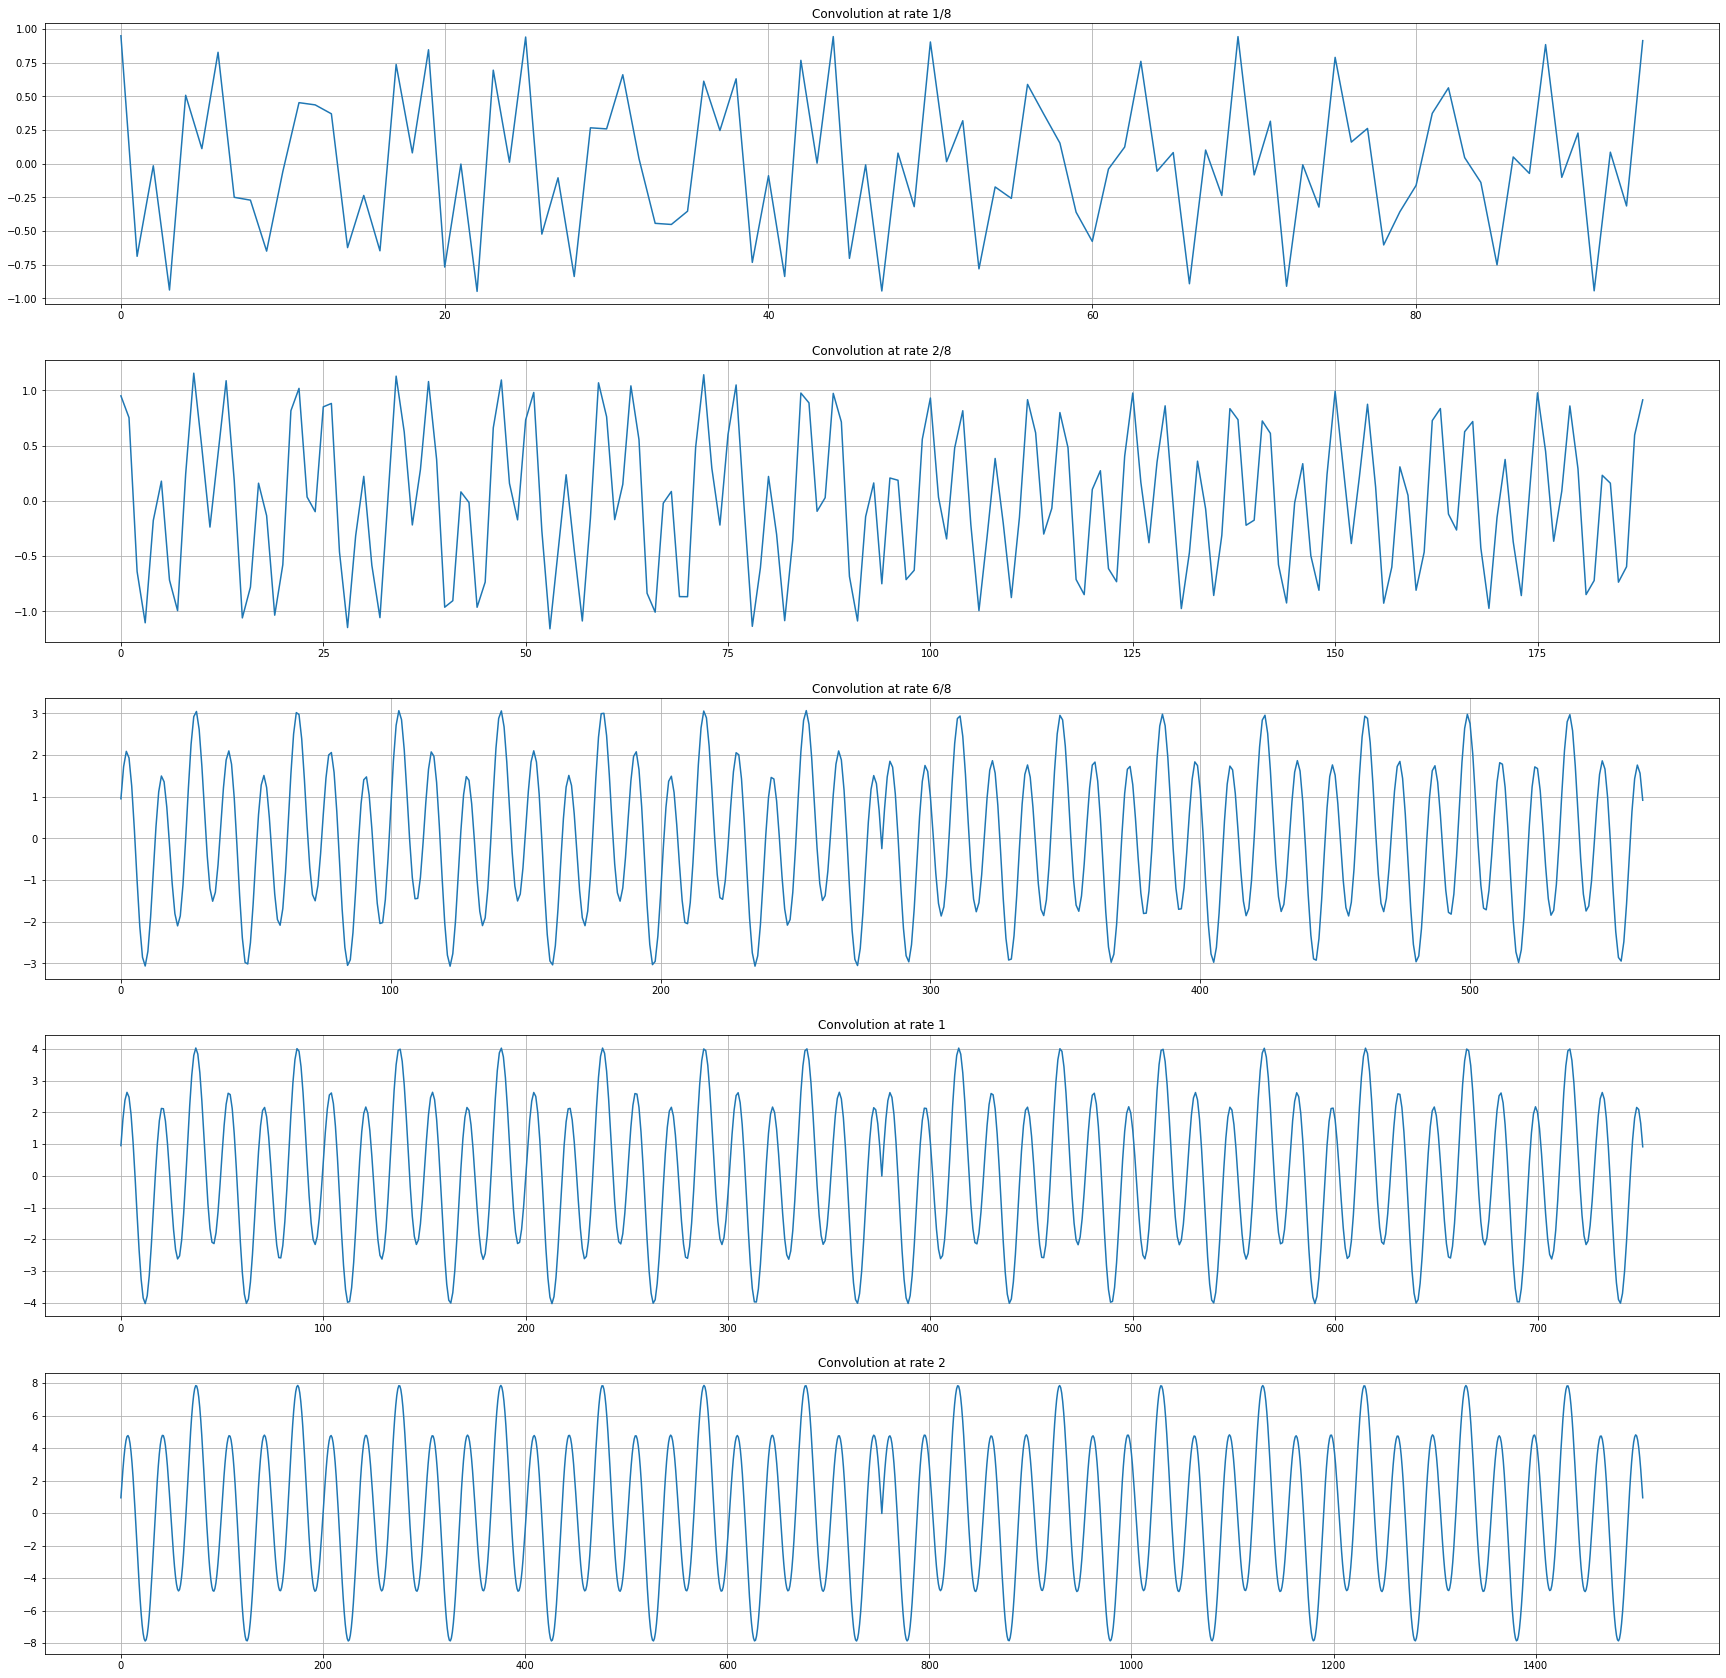

In [6]:
plt.figure(figsize=(30, 30))

plt.subplot(5,1,1)
conv1 = convolver(y,y10)
plt.plot(conv1)
plt.grid(True)
plt.title('Convolution at rate 1/8')


plt.subplot(5,1,2)
conv2 = convolver(y1,y11)
plt.plot(conv2)
plt.grid(True)
plt.title('Convolution at rate 2/8')


plt.subplot(5,1,3)
conv3 = convolver(y2,y12)
plt.plot(conv3)
plt.grid(True)
plt.title('Convolution at rate 6/8')

plt.subplot(5,1,4)
conv4 = convolver(y3,y13)
plt.plot(conv4)
plt.grid(True)
plt.title('Convolution at rate 1')

plt.subplot(5,1,5)
conv5 = np.convolve(y4,y14)
plt.plot(conv5)
plt.grid(True)
plt.title('Convolution at rate 2')

It is checked that np.convolve gives the same result with hand written convolution function.